In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

<function matplotlib.pyplot.show(*args, **kw)>

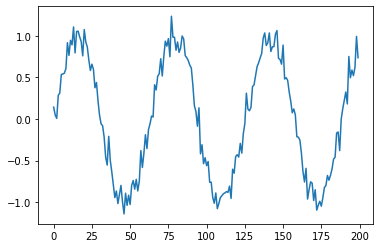

In [ ]:
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1 #noisy sin wave
plt.plot(series)
plt.show

In [ ]:
#Building the dataset: 
T = 10 #10 previous time steps to predict next time step
X = []
Y = []
for t in range(len(series) - T):
  x = series[t : t + T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape = ", X.shape)
print("Y.shape = ", Y.shape)

X.shape =  (190, 10)
Y.shape =  (190,)


In [ ]:
i = Input(shape = (T,))
x = Dense(1)(i)

model = Model(i, x)

In [ ]:
model.compile(
    loss = 'mse',
    optimizer = Adam(lr = 0.1)
)

r = model.fit(
    X[: -N // 2], Y[: -N // 2], #model trains on first half of sequence and validates on second half as a random split will not make sense
    epochs = 80,
    validation_data = (X[-N // 2:], Y[-N // 2:])
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 88ms/step - loss: 0.1838 - val_loss: 0.0807
Epoch 2/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0459 - val_loss: 0.0564
Epoch 3/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0617 - val_loss: 0.0682
Epoch 4/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0670 - val_loss: 0.0659
Epoch 5/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0526 - val_loss: 0.0307
Epoch 6/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0312 - val_loss: 0.0270
Epoch 7/80
3/3 [==============================] - 0s 21ms/step - loss: 0.0376 - val_loss: 0.0323
Epoch 8/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0388 - val_loss: 0.0317
Epoch 9/80
3/3 [==============================] - 0s 27ms/step - loss: 0.0318 - val_loss: 0.0252
Epoch 10/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0267 - val_loss: 0.0222
Epoch 11/80
3/3 [=======================

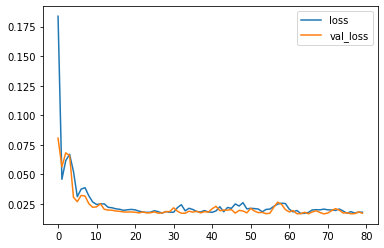

In [ ]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
#Wrong way to forecast: Using only given values to predict future
val_target = Y[-N//2:]
val_prediction = []
i = -N // 2
while len(val_prediction) < len(val_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] #input should be 2-D(matrix), output is also a matrix.
  val_prediction.append(p)
  i += 1

1/1 [==============================] - 0s 17ms/step


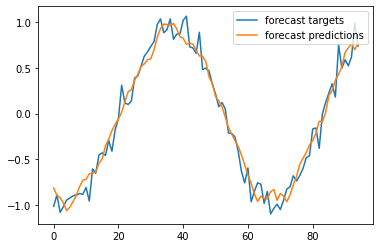

In [ ]:
#Even though this looks correct, it is an incorrect way of forecasting, as we are not predicting future values using predicted values.
plt.plot(val_target, label = 'forecast targets')
plt.plot(val_prediction, label = 'forecast predictions')
plt.legend()
plt.show()

In [ ]:
#Correct method of forecasting future values:
val_target = Y[-N//2:]
val_prediction = []
last_x = X[-N // 2]
while len(val_prediction) < len(val_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0]
  val_prediction.append(p)
  last_x = np.roll(last_x, -1) #Circular left shift of 1D array
  last_x[-1] = p #Replacing last element with latest prediction

1/1 [==============================] - 0s 19ms/step


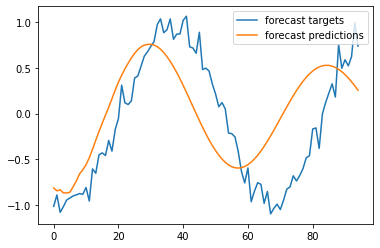

In [ ]:
#Real life scenario where the model doesn't perform as well due to noise
#Still learns that the underlying function is periodic and smooth
plt.plot(val_target, label = 'forecast targets')
plt.plot(val_prediction, label = 'forecast predictions')
plt.legend()
plt.show()